# Things to do: 
- What is CDD and HDD and what does it do?
- Lag Variable function updates
- Plotting total demand by 30min and group by week day
- Outlier handling: How we want to approach outliers found (Trimming, Capping, Discretization) 
- Plot demand vs season

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# pd.options.display.max_columns = 50
# pd.options.display.max_rows = 50
# pd.options.display.width = 120
# pd.options.display.float_format = '{:.2f}'.format

# Loading Data
Loading data from the processed and combined csv file into the dataframe to commence preprocessing and cleansing.

In [4]:
source_data = r'./../data/NSW/processed_data.csv'  
# todo: this comes from my earlier stuff, need to add this work to that. no point in having 2 files

In [5]:
source_df = pd.read_csv(source_data).set_index('Unnamed: 0')
source_df

,PREDISPATCHSEQNO,PERIODID,FORECASTDEMAND,TOTALDEMAND,TEMPERATURE,totaldemand,rrp,smoothed_FORECASTDEMAND,smoothed_TOTALDEMAND,smoothed_TEMPERATURE,FORECASTDEMAND_daily,TOTALDEMAND_daily,normalized_TOTALDEMAND,normalized_FORECASTDEMAND,normalized_TEMPERATURE
Unnamed: 0,,,,,,,,,,,,,,,
2010-01-01 00:30:00,2.009123e+09,36.5,7680.510417,7809.31,22.9,7809.31,21.50,7699.974365,7781.995417,25.233333,7804.668591,8017.459792,-0.232608,-0.325943,0.916251
2010-01-01 01:00:00,2.009123e+09,37.0,7428.971370,7483.69,22.6,7483.69,20.98,7690.566078,7773.996250,25.266667,7804.668591,8017.459792,-0.483133,-0.518995,0.865312
2010-01-01 01:30:00,2.009123e+09,37.5,7084.802162,7117.23,22.5,7117.23,20.06,7681.336748,7766.966458,25.302083,7804.668591,8017.459792,-0.765079,-0.783139,0.848332
2010-01-01 02:00:00,2.009123e+09,38.0,6751.369600,6812.03,22.5,6812.03,17.93,7672.747139,7760.413125,25.335417,7804.668591,8017.459792,-0.999894,-1.039043,0.848332
2010-01-01 02:30:00,2.009123e+09,38.5,6484.270789,6544.33,22.4,6544.33,17.43,7665.716673,7756.316458,25.366667,7804.668591,8017.459792,-1.205856,-1.244036,0.831352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-17 22:00:00,2.021032e+09,34.0,7317.702687,7419.77,19.7,7419.77,32.00,7400.366626,7422.855208,19.712500,6961.076901,7094.510000,-0.532312,-0.604392,0.372894
2021-03-17 22:30:00,2.021032e+09,34.5,7266.887647,7417.91,19.5,7417.91,37.01,7399.723912,7424.357917,19.691667,6961.076901,7094.510000,-0.533743,-0.643392,0.338934
2021-03-17 23:00:00,2.021032e+09,35.0,7173.866522,7287.32,19.1,7287.32,34.49,7399.132502,7425.781458,19.666667,6961.076901,7094.510000,-0.634216,-0.714784,0.271015


Checking if there are any NA values that we need to take into considering or drop the columns completely since data has been smoothed.

In [6]:
source_df.isna().sum()

PREDISPATCHSEQNO              0
PERIODID                      0
FORECASTDEMAND                0
TOTALDEMAND                   0
TEMPERATURE                   0
totaldemand                   0
rrp                           0
smoothed_FORECASTDEMAND       0
smoothed_TOTALDEMAND          0
smoothed_TEMPERATURE          0
FORECASTDEMAND_daily         33
TOTALDEMAND_daily            33
normalized_TOTALDEMAND        0
normalized_FORECASTDEMAND     0
normalized_TEMPERATURE        0
dtype: int64

In [7]:
source_df.columns

Index(['PREDISPATCHSEQNO', 'PERIODID', 'FORECASTDEMAND', 'TOTALDEMAND',
       'TEMPERATURE', 'totaldemand', 'rrp', 'smoothed_FORECASTDEMAND',
       'smoothed_TOTALDEMAND', 'smoothed_TEMPERATURE', 'FORECASTDEMAND_daily',
       'TOTALDEMAND_daily', 'normalized_TOTALDEMAND',
       'normalized_FORECASTDEMAND', 'normalized_TEMPERATURE'],
      dtype='object')

In [8]:
source_df.dtypes

PREDISPATCHSEQNO             float64
PERIODID                     float64
FORECASTDEMAND               float64
TOTALDEMAND                  float64
TEMPERATURE                  float64
totaldemand                  float64
rrp                          float64
smoothed_FORECASTDEMAND      float64
smoothed_TOTALDEMAND         float64
smoothed_TEMPERATURE         float64
FORECASTDEMAND_daily         float64
TOTALDEMAND_daily            float64
normalized_TOTALDEMAND       float64
normalized_FORECASTDEMAND    float64
normalized_TEMPERATURE       float64
dtype: object

In [9]:
updated_df = source_df

In [10]:
updated_df.index

Index(['2010-01-01 00:30:00', '2010-01-01 01:00:00', '2010-01-01 01:30:00',
       '2010-01-01 02:00:00', '2010-01-01 02:30:00', '2010-01-01 03:00:00',
       '2010-01-01 03:30:00', '2010-01-01 04:00:00', '2010-01-01 04:30:00',
       '2010-01-01 05:00:00',
       ...
       '2021-03-17 19:30:00', '2021-03-17 20:00:00', '2021-03-17 20:30:00',
       '2021-03-17 21:00:00', '2021-03-17 21:30:00', '2021-03-17 22:00:00',
       '2021-03-17 22:30:00', '2021-03-17 23:00:00', '2021-03-17 23:30:00',
       '2021-03-18 00:00:00'],
      dtype='object', name='Unnamed: 0', length=194589)

In [11]:
updated_df.index=pd.to_datetime(updated_df.index)

Dropped Forecast_Daily and TotalDemand_daily - contained 33 N/A's.

In [12]:
updated_df.drop(['FORECASTDEMAND_daily', 'TOTALDEMAND_daily'], axis=1, inplace=True)

In [13]:
updated_df.isna().sum()

PREDISPATCHSEQNO             0
PERIODID                     0
FORECASTDEMAND               0
TOTALDEMAND                  0
TEMPERATURE                  0
totaldemand                  0
rrp                          0
smoothed_FORECASTDEMAND      0
smoothed_TOTALDEMAND         0
smoothed_TEMPERATURE         0
normalized_TOTALDEMAND       0
normalized_FORECASTDEMAND    0
normalized_TEMPERATURE       0
dtype: int64

In [14]:
updated_df

,PREDISPATCHSEQNO,PERIODID,FORECASTDEMAND,TOTALDEMAND,TEMPERATURE,totaldemand,rrp,smoothed_FORECASTDEMAND,smoothed_TOTALDEMAND,smoothed_TEMPERATURE,normalized_TOTALDEMAND,normalized_FORECASTDEMAND,normalized_TEMPERATURE
Unnamed: 0,,,,,,,,,,,,,
2010-01-01 00:30:00,2.009123e+09,36.5,7680.510417,7809.31,22.9,7809.31,21.50,7699.974365,7781.995417,25.233333,-0.232608,-0.325943,0.916251
2010-01-01 01:00:00,2.009123e+09,37.0,7428.971370,7483.69,22.6,7483.69,20.98,7690.566078,7773.996250,25.266667,-0.483133,-0.518995,0.865312
2010-01-01 01:30:00,2.009123e+09,37.5,7084.802162,7117.23,22.5,7117.23,20.06,7681.336748,7766.966458,25.302083,-0.765079,-0.783139,0.848332
2010-01-01 02:00:00,2.009123e+09,38.0,6751.369600,6812.03,22.5,6812.03,17.93,7672.747139,7760.413125,25.335417,-0.999894,-1.039043,0.848332
2010-01-01 02:30:00,2.009123e+09,38.5,6484.270789,6544.33,22.4,6544.33,17.43,7665.716673,7756.316458,25.366667,-1.205856,-1.244036,0.831352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-17 22:00:00,2.021032e+09,34.0,7317.702687,7419.77,19.7,7419.77,32.00,7400.366626,7422.855208,19.712500,-0.532312,-0.604392,0.372894
2021-03-17 22:30:00,2.021032e+09,34.5,7266.887647,7417.91,19.5,7417.91,37.01,7399.723912,7424.357917,19.691667,-0.533743,-0.643392,0.338934
2021-03-17 23:00:00,2.021032e+09,35.0,7173.866522,7287.32,19.1,7287.32,34.49,7399.132502,7425.781458,19.666667,-0.634216,-0.714784,0.271015


In [15]:
updated_df.head()

,PREDISPATCHSEQNO,PERIODID,FORECASTDEMAND,TOTALDEMAND,TEMPERATURE,totaldemand,rrp,smoothed_FORECASTDEMAND,smoothed_TOTALDEMAND,smoothed_TEMPERATURE,normalized_TOTALDEMAND,normalized_FORECASTDEMAND,normalized_TEMPERATURE
Unnamed: 0,,,,,,,,,,,,,
2010-01-01 00:30:00,2.009123e+09,36.5,7680.510417,7809.31,22.9,7809.31,21.50,7699.974365,7781.995417,25.233333,-0.232608,-0.325943,0.916251
2010-01-01 01:00:00,2.009123e+09,37.0,7428.971370,7483.69,22.6,7483.69,20.98,7690.566078,7773.996250,25.266667,-0.483133,-0.518995,0.865312
2010-01-01 01:30:00,2.009123e+09,37.5,7084.802162,7117.23,22.5,7117.23,20.06,7681.336748,7766.966458,25.302083,-0.765079,-0.783139,0.848332
2010-01-01 02:00:00,2.009123e+09,38.0,6751.369600,6812.03,22.5,6812.03,17.93,7672.747139,7760.413125,25.335417,-0.999894,-1.039043,0.848332
2010-01-01 02:30:00,2.009123e+09,38.5,6484.270789,6544.33,22.4,6544.33,17.43,7665.716673,7756.316458,25.366667,-1.205856,-1.244036,0.831352


# Feature Engineering

## DateTime Features
The following section creates date time features.

In [16]:
demand = updated_df.copy()
demand = demand[['totaldemand']]
demand.loc[:, 'dow'] = demand.index.dayofweek
demand.loc[:, 'doy'] = demand.index.dayofyear
demand.loc[:, 'year'] = demand.index.year
demand.loc[:, 'month'] = demand.index.month
demand.loc[:, 'quarter'] = demand.index.quarter
demand.loc[:, 'hour'] = demand.index.hour


In [17]:
demand.head()

,totaldemand,dow,doy,year,month,quarter,hour
Unnamed: 0,,,,,,,
2010-01-01 00:30:00,7809.31,4,1,2010,1,1,0
2010-01-01 01:00:00,7483.69,4,1,2010,1,1,1
2010-01-01 01:30:00,7117.23,4,1,2010,1,1,1
2010-01-01 02:00:00,6812.03,4,1,2010,1,1,2
2010-01-01 02:30:00,6544.33,4,1,2010,1,1,2


In [18]:
demand.iloc[45: 60]

,totaldemand,dow,doy,year,month,quarter,hour
Unnamed: 0,,,,,,,
2010-01-01 23:00:00,8041.77,4,1,2010,1,1,23
2010-01-01 23:30:00,7782.68,4,1,2010,1,1,23
2010-01-02 00:00:00,7574.85,5,2,2010,1,1,0
2010-01-02 00:30:00,7343.30,5,2,2010,1,1,0
2010-01-02 01:00:00,7099.73,5,2,2010,1,1,1
2010-01-02 01:30:00,6779.80,5,2,2010,1,1,1
2010-01-02 02:00:00,6497.47,5,2,2010,1,1,2
2010-01-02 02:30:00,6347.69,5,2,2010,1,1,2
2010-01-02 03:00:00,6223.64,5,2,2010,1,1,3


Merge to the updated_df

In [19]:
demand.isna().sum()

totaldemand    0
dow            0
doy            0
year           0
month          0
quarter        0
hour           0
dtype: int64

In [20]:
demand.index

DatetimeIndex(['2010-01-01 00:30:00', '2010-01-01 01:00:00',
               '2010-01-01 01:30:00', '2010-01-01 02:00:00',
               '2010-01-01 02:30:00', '2010-01-01 03:00:00',
               '2010-01-01 03:30:00', '2010-01-01 04:00:00',
               '2010-01-01 04:30:00', '2010-01-01 05:00:00',
               ...
               '2021-03-17 19:30:00', '2021-03-17 20:00:00',
               '2021-03-17 20:30:00', '2021-03-17 21:00:00',
               '2021-03-17 21:30:00', '2021-03-17 22:00:00',
               '2021-03-17 22:30:00', '2021-03-17 23:00:00',
               '2021-03-17 23:30:00', '2021-03-18 00:00:00'],
              dtype='datetime64[ns]', name='Unnamed: 0', length=194589, freq=None)

In [21]:
final_df = pd.merge(updated_df, demand, left_index=True, right_index=True)

In [22]:
final_df

,PREDISPATCHSEQNO,PERIODID,FORECASTDEMAND,TOTALDEMAND,TEMPERATURE,totaldemand_x,rrp,smoothed_FORECASTDEMAND,smoothed_TOTALDEMAND,smoothed_TEMPERATURE,normalized_TOTALDEMAND,normalized_FORECASTDEMAND,normalized_TEMPERATURE,totaldemand_y,dow,doy,year,month,quarter,hour
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:30:00,2.009123e+09,36.5,7680.510417,7809.31,22.9,7809.31,21.50,7699.974365,7781.995417,25.233333,-0.232608,-0.325943,0.916251,7809.31,4,1,2010,1,1,0
2010-01-01 01:00:00,2.009123e+09,37.0,7428.971370,7483.69,22.6,7483.69,20.98,7690.566078,7773.996250,25.266667,-0.483133,-0.518995,0.865312,7483.69,4,1,2010,1,1,1
2010-01-01 01:30:00,2.009123e+09,37.5,7084.802162,7117.23,22.5,7117.23,20.06,7681.336748,7766.966458,25.302083,-0.765079,-0.783139,0.848332,7117.23,4,1,2010,1,1,1
2010-01-01 02:00:00,2.009123e+09,38.0,6751.369600,6812.03,22.5,6812.03,17.93,7672.747139,7760.413125,25.335417,-0.999894,-1.039043,0.848332,6812.03,4,1,2010,1,1,2
2010-01-01 02:30:00,2.009123e+09,38.5,6484.270789,6544.33,22.4,6544.33,17.43,7665.716673,7756.316458,25.366667,-1.205856,-1.244036,0.831352,6544.33,4,1,2010,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-17 22:00:00,2.021032e+09,34.0,7317.702687,7419.77,19.7,7419.77,32.00,7400.366626,7422.855208,19.712500,-0.532312,-0.604392,0.372894,7419.77,2,76,2021,3,1,22
2021-03-17 22:30:00,2.021032e+09,34.5,7266.887647,7417.91,19.5,7417.91,37.01,7399.723912,7424.357917,19.691667,-0.533743,-0.643392,0.338934,7417.91,2,76,2021,3,1,22
2021-03-17 23:00:00,2.021032e+09,35.0,7173.866522,7287.32,19.1,7287.32,34.49,7399.132502,7425.781458,19.666667,-0.634216,-0.714784,0.271015,7287.32,2,76,2021,3,1,23


In [23]:
# final_df.isna().sum()

In [24]:
# final_df.index

## Adding Season Data
Season data being added to the dataframe before the final_df is created and exported to csv.

In [25]:
final_df['season'] = final_df['month'].apply(lambda month: 1 if month in [12, 1, 2] else
                                  (2 if month in [3, 4, 5] else
                                  (3 if month in [6, 7, 8] else
                                  (4 if month in [9, 10, 11] else None))))

In [26]:
final_df.index

DatetimeIndex(['2010-01-01 00:30:00', '2010-01-01 01:00:00',
               '2010-01-01 01:30:00', '2010-01-01 02:00:00',
               '2010-01-01 02:30:00', '2010-01-01 03:00:00',
               '2010-01-01 03:30:00', '2010-01-01 04:00:00',
               '2010-01-01 04:30:00', '2010-01-01 05:00:00',
               ...
               '2021-03-17 19:30:00', '2021-03-17 20:00:00',
               '2021-03-17 20:30:00', '2021-03-17 21:00:00',
               '2021-03-17 21:30:00', '2021-03-17 22:00:00',
               '2021-03-17 22:30:00', '2021-03-17 23:00:00',
               '2021-03-17 23:30:00', '2021-03-18 00:00:00'],
              dtype='datetime64[ns]', name='Unnamed: 0', length=194589, freq=None)

In [27]:
final_df.head()

,PREDISPATCHSEQNO,PERIODID,FORECASTDEMAND,TOTALDEMAND,TEMPERATURE,totaldemand_x,rrp,smoothed_FORECASTDEMAND,smoothed_TOTALDEMAND,smoothed_TEMPERATURE,...,normalized_FORECASTDEMAND,normalized_TEMPERATURE,totaldemand_y,dow,doy,year,month,quarter,hour,season
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:30:00,2.009123e+09,36.5,7680.510417,7809.31,22.9,7809.31,21.50,7699.974365,7781.995417,25.233333,...,-0.325943,0.916251,7809.31,4,1,2010,1,1,0,1
2010-01-01 01:00:00,2.009123e+09,37.0,7428.971370,7483.69,22.6,7483.69,20.98,7690.566078,7773.996250,25.266667,...,-0.518995,0.865312,7483.69,4,1,2010,1,1,1,1
2010-01-01 01:30:00,2.009123e+09,37.5,7084.802162,7117.23,22.5,7117.23,20.06,7681.336748,7766.966458,25.302083,...,-0.783139,0.848332,7117.23,4,1,2010,1,1,1,1
2010-01-01 02:00:00,2.009123e+09,38.0,6751.369600,6812.03,22.5,6812.03,17.93,7672.747139,7760.413125,25.335417,...,-1.039043,0.848332,6812.03,4,1,2010,1,1,2,1
2010-01-01 02:30:00,2.009123e+09,38.5,6484.270789,6544.33,22.4,6544.33,17.43,7665.716673,7756.316458,25.366667,...,-1.244036,0.831352,6544.33,4,1,2010,1,1,2,1


# Exporting Dataframe to CSV
The final dataframe is being exported to csv so that it can be used for additional analysis and modelling.

In [28]:
# final_df.to_csv(os.path.join('./../data/NSW', 'final_df.csv'))
# todo: this is what i have been working on but i need to add the later work

## Degree Days

In [29]:
def Degree_Days2(df, HDD_ct=17, CDD_ct=19.5):
    Tbar = df.resample('24H', offset='21H').mean() # Mean from 9pm (day i-1) - 9pm (day i)
    DD = pd.DataFrame(index=df.index, columns=['HDD', 'CDD'])
    for i in range(0,Tbar.shape[0]):
        DD['HDD'].iloc[48*(i):48*(i+1)] = max(0, HDD_ct-Tbar.iloc[i])
        DD['CDD'].iloc[48*(i):48*(i+1)] = max(0, Tbar.iloc[i]-CDD_ct)
    return Tbar, DD

In [30]:
Degree_Days2(final_df['TEMPERATURE'])

(Unnamed: 0
 2009-12-31 21:00:00    25.263415
 2010-01-01 21:00:00    25.093750
 2010-01-02 21:00:00    19.943750
 2010-01-03 21:00:00    20.610417
 2010-01-04 21:00:00    22.425000
                          ...    
 2021-03-13 21:00:00    19.379167
 2021-03-14 21:00:00    17.135417
 2021-03-15 21:00:00    17.508333
 2021-03-16 21:00:00    19.747917
 2021-03-17 21:00:00    19.228571
 Freq: 24H, Name: TEMPERATURE, Length: 4095, dtype: float64,
                     HDD       CDD
 Unnamed: 0                       
 2010-01-01 00:30:00   0  5.763415
 2010-01-01 01:00:00   0  5.763415
 2010-01-01 01:30:00   0  5.763415
 2010-01-01 02:00:00   0  5.763415
 2010-01-01 02:30:00   0  5.763415
 ...                  ..       ...
 2021-03-17 22:00:00   0  4.420833
 2021-03-17 22:30:00   0  4.420833
 2021-03-17 23:00:00   0  4.420833
 2021-03-17 23:30:00   0  4.420833
 2021-03-18 00:00:00   0  4.420833
 
 [194589 rows x 2 columns])

In [31]:
Tbar, DD = Degree_Days2(final_df['TEMPERATURE'])
# todo: is Tbar a new variable?

In [32]:
Tbar.isna().sum()

30

In [33]:
DD.isna().sum()

HDD    0
CDD    0
dtype: int64

In [34]:
DD['HDD']

Unnamed: 0
2010-01-01 00:30:00    0
2010-01-01 01:00:00    0
2010-01-01 01:30:00    0
2010-01-01 02:00:00    0
2010-01-01 02:30:00    0
                      ..
2021-03-17 22:00:00    0
2021-03-17 22:30:00    0
2021-03-17 23:00:00    0
2021-03-17 23:30:00    0
2021-03-18 00:00:00    0
Name: HDD, Length: 194589, dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


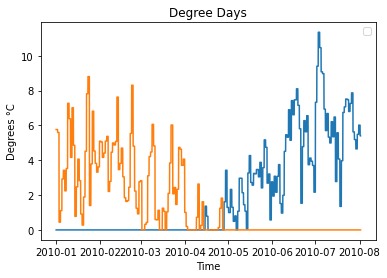

In [35]:
plt.plot(DD.iloc[1: 10000])
plt.title("Degree Days")
plt.xlabel("Time")
plt.ylabel("Degrees °C")
plt.legend()
plt.show()
# todo: fix warnings
# todo: are these new vars that need to be added to final_df?

# Outliers
Outlier detection is a method used to find unusual or abnormal data points in a data set. 
Methods of treating outliers:
- Trimming: removing the data from the dataset
- Capping:For instance, if we decide on a specific value, any data point above or below that value is considered an outlier. 
- Discretization: create groups and categorise the outliers into specific group making them follow the same behavior as the other points in that group.

## Temperature
The following section looks at the outlier identification within the Temperature column of our dataframe.

In [36]:
temp_df = final_df[['TEMPERATURE', 'month', 'season']]

### ScatterPlot of Temperature

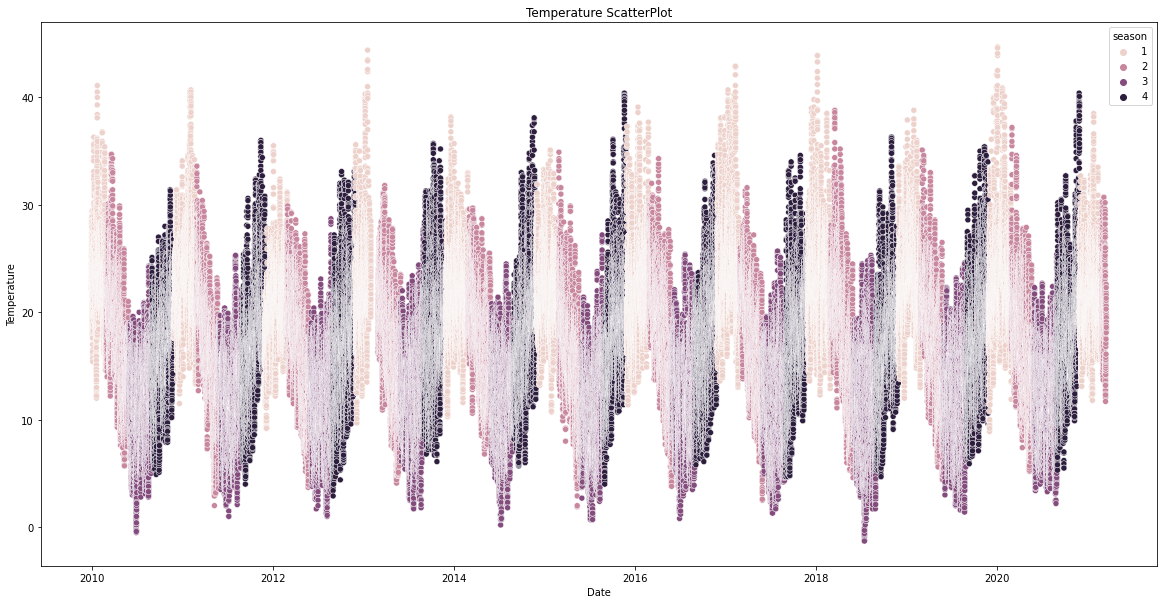

In [37]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=temp_df, x='Unnamed: 0', y='TEMPERATURE', hue='season')
plt.title('Temperature ScatterPlot')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

### Boxplot of Temperature
The boxplot is a method which allows for the easy visualisation of outliers within a given dataset. It can be seen that there are a number of data points within temperature which are at the very extreme and could be considered as outliers.

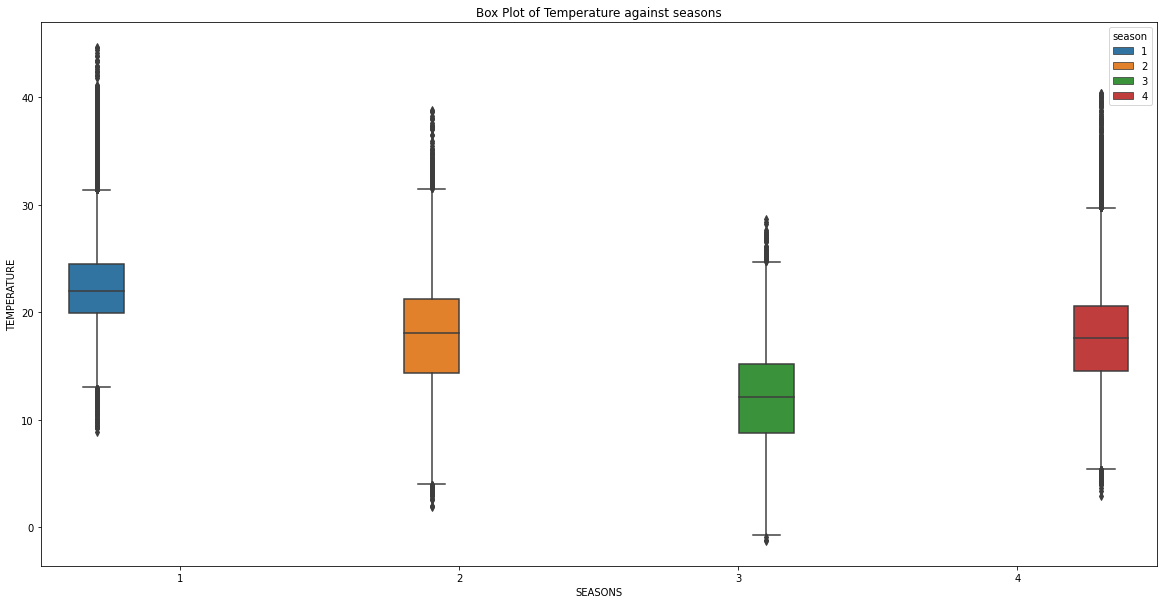

In [38]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=temp_df, x='season', y='TEMPERATURE', hue='season')
plt.title('Box Plot of Temperature against seasons')
plt.xlabel('SEASONS')
plt.ylabel('TEMPERATURE')
plt.show()
# todo: is season a new variable?

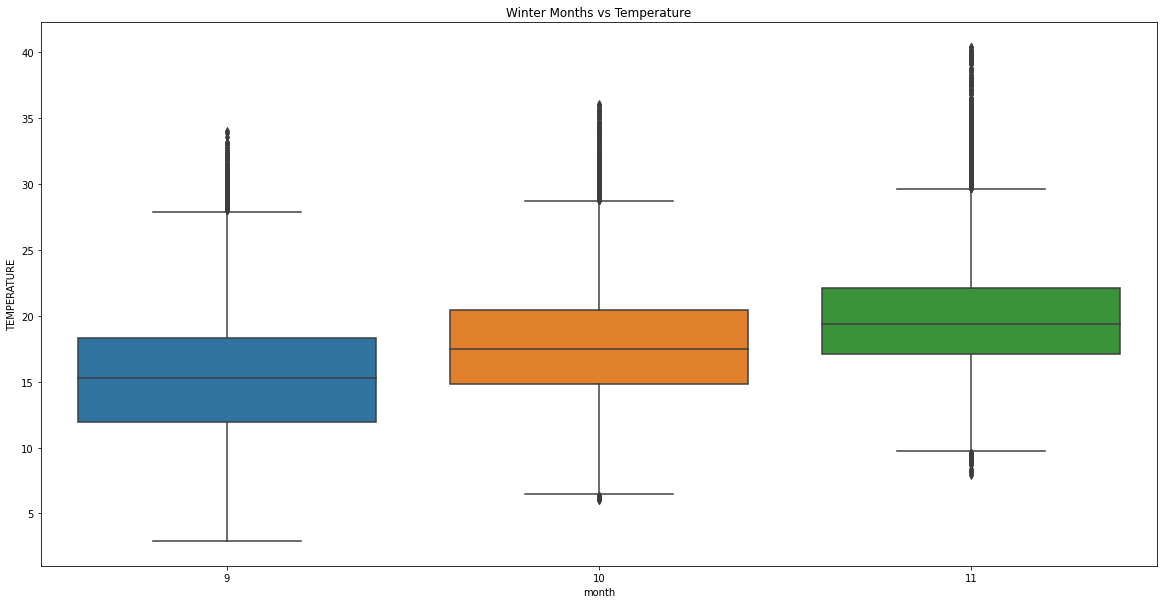

In [39]:
plt.figure(figsize=(20,10))
sns.boxplot(data=temp_df[temp_df['season']==4], x='month', y='TEMPERATURE')
plt.title('Winter Months vs Temperature')
plt.show()

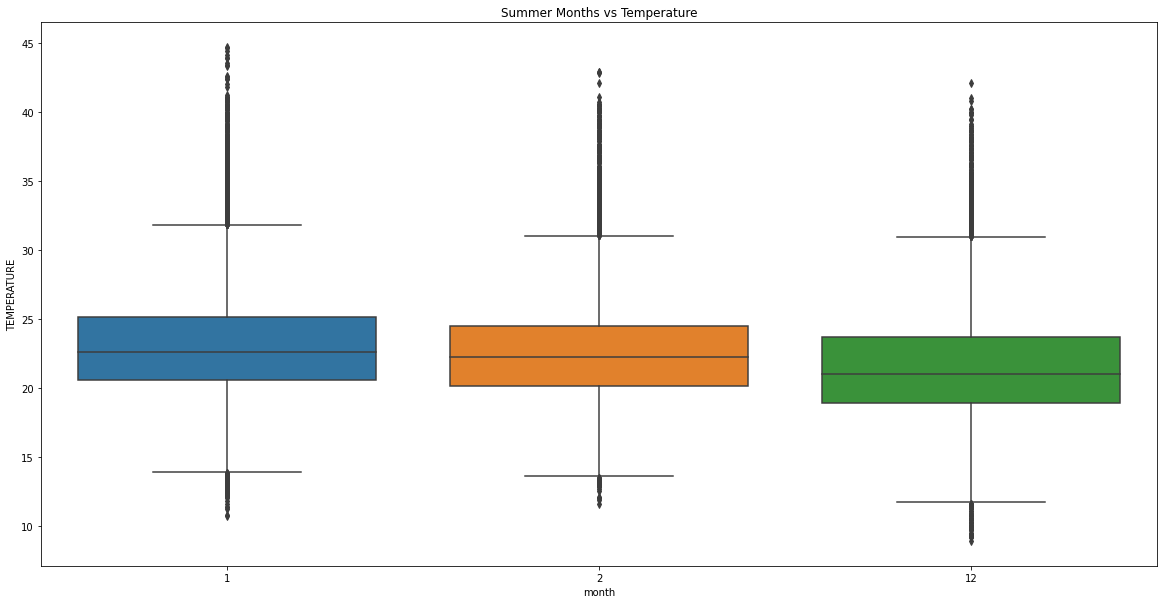

In [40]:
plt.figure(figsize=(20,10))
sns.boxplot(data=temp_df[temp_df['season']==1], x='month', y='TEMPERATURE')
plt.title('Summer Months vs Temperature')
plt.show()

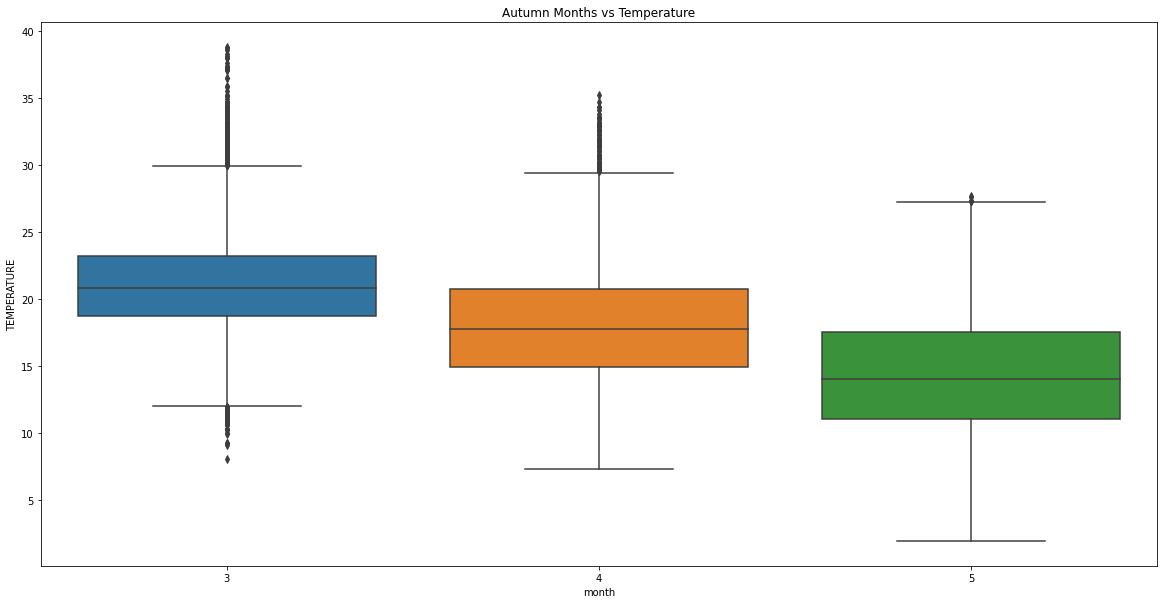

In [41]:
plt.figure(figsize=(20,10))
sns.boxplot(data=temp_df[temp_df['season']==2], x='month', y='TEMPERATURE')
plt.title('Autumn Months vs Temperature')
plt.show()

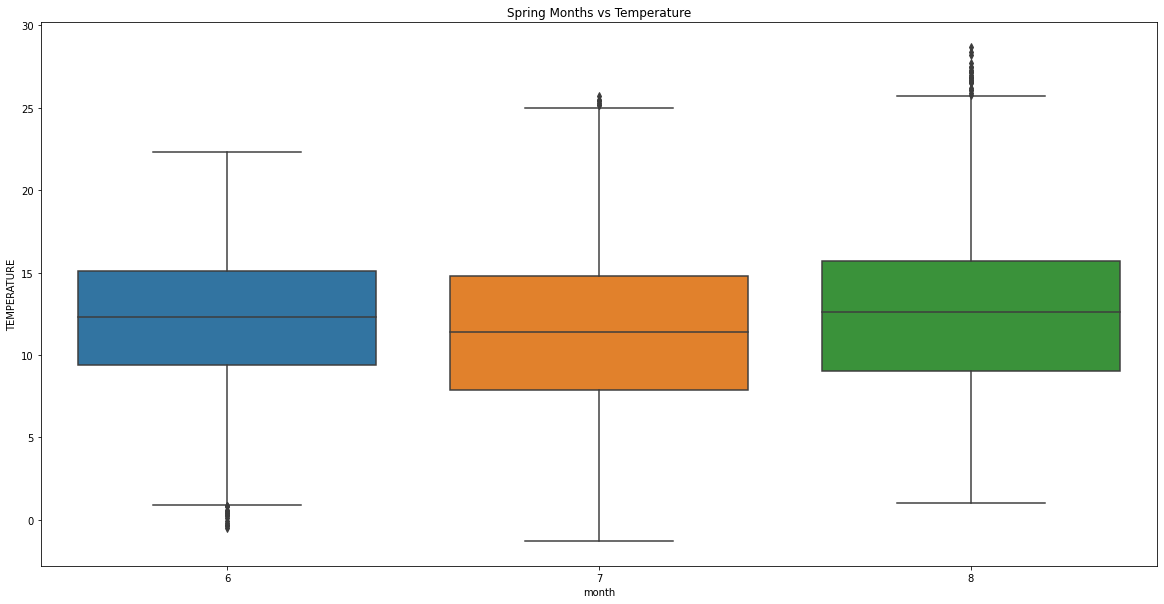

In [42]:
plt.figure(figsize=(20,10))
sns.boxplot(data=temp_df[temp_df['season']==3], x='month', y='TEMPERATURE')
plt.title('Spring Months vs Temperature')
plt.show()

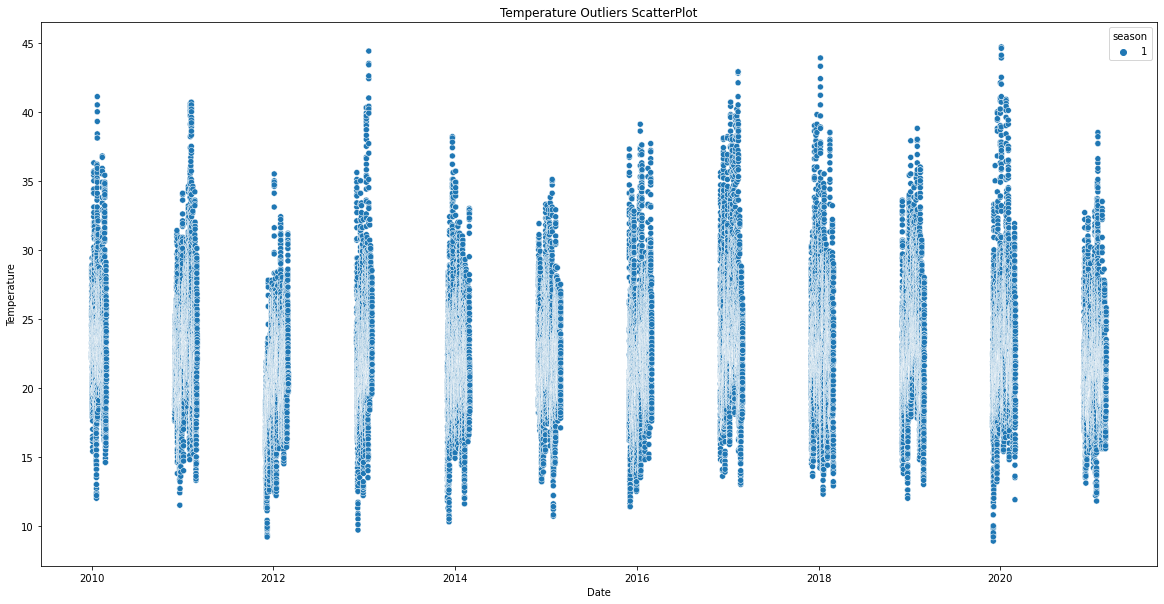

In [43]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=final_df[final_df['season']==1], x='Unnamed: 0', y='TEMPERATURE', hue='season')
plt.title('Temperature Outliers ScatterPlot')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

## Temperature Outliers
The following sections looks further into the outliers for temperature which were identified in the temperature column of our datasets.

In [44]:
temp_highest_allowed = round(temp_df['TEMPERATURE'].mean() + 3 * temp_df['TEMPERATURE'].std(), 2)
temp_lowest_allowed = round(temp_df['TEMPERATURE'].mean() - 3 * temp_df['TEMPERATURE'].std(), 2)
print('Highest Allowed:', temp_highest_allowed)
print('Lowest Allowed:', temp_lowest_allowed)

Highest Allowed: 35.17
Lowest Allowed: -0.16


In [45]:
temp_outliers = temp_df[(temp_df['TEMPERATURE']>temp_highest_allowed) | (temp_df['TEMPERATURE'] < temp_lowest_allowed)]
print('Total Rows:', len(temp_outliers))

Total Rows: 569


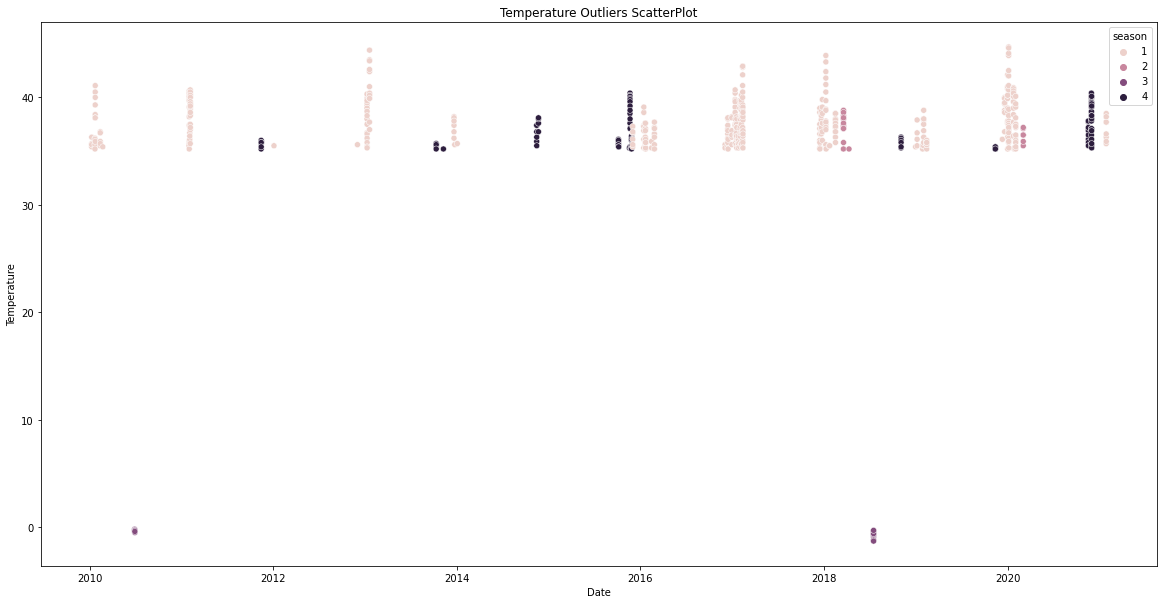

In [46]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=temp_outliers, x='Unnamed: 0', y='TEMPERATURE', hue='season')
plt.title('Temperature Outliers ScatterPlot')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [47]:
temp_month_df = temp_df[[]]
# fix_me: what was the plan here? 

### High Temperature Values
Outliers were identified for temperature values and high temperature outliers are more frequent from Nov to March. Indicating that during this period predictions may be less accurate.

In [48]:
high_outliers = temp_outliers.loc[temp_outliers['TEMPERATURE'] > temp_highest_allowed]
t_high_df = high_outliers['month'].value_counts()
t_high_df = t_high_df.reset_index()
t_high_df.columns = ['Month','Count']
t_high_df_sorted = t_high_df.sort_values(by='Month', ascending=True)
# print(test_df_sorted)
# fix_me: problem here with undefined dfs

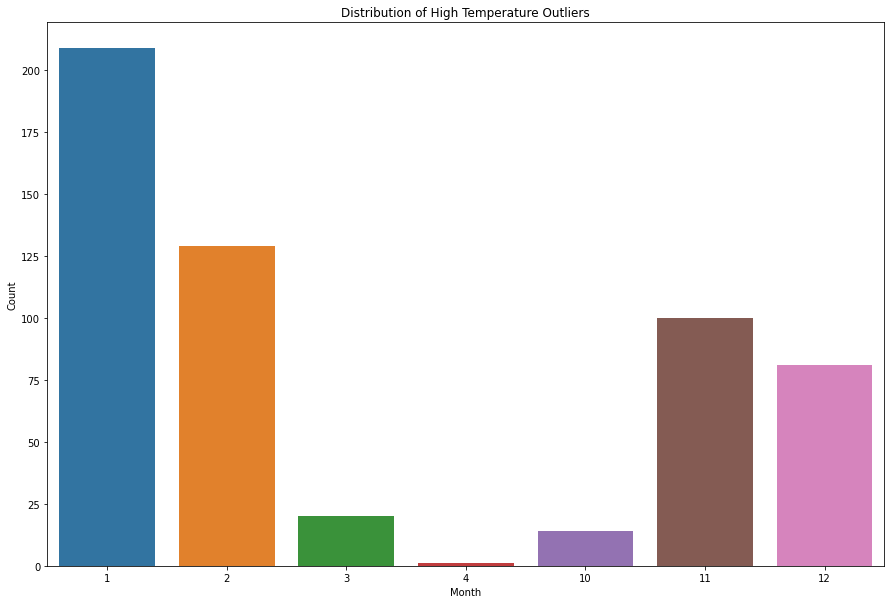

In [49]:
# histogram
plt.figure(figsize=(15, 10))
sns.barplot(data=t_high_df_sorted, x='Month', y='Count')
plt.title('Distribution of High Temperature Outliers')
plt.show()

### Low Temperature Values
Lower tempature variations are far less those outliers observed for higher temperature variations. Lower tempature values can be found in June and July (Winter periods).

In [50]:
low_outliers = temp_outliers.loc[temp_outliers['TEMPERATURE'] < temp_lowest_allowed]
t_low_df = low_outliers['month'].value_counts()
t_low_df = t_low_df.reset_index()
t_low_df.columns = ['Month','Count']
t_low_df_sorted = t_low_df.sort_values(by='Month', ascending=True)
print(t_low_df_sorted)

   Month  Count
1      6      5
0      7     10


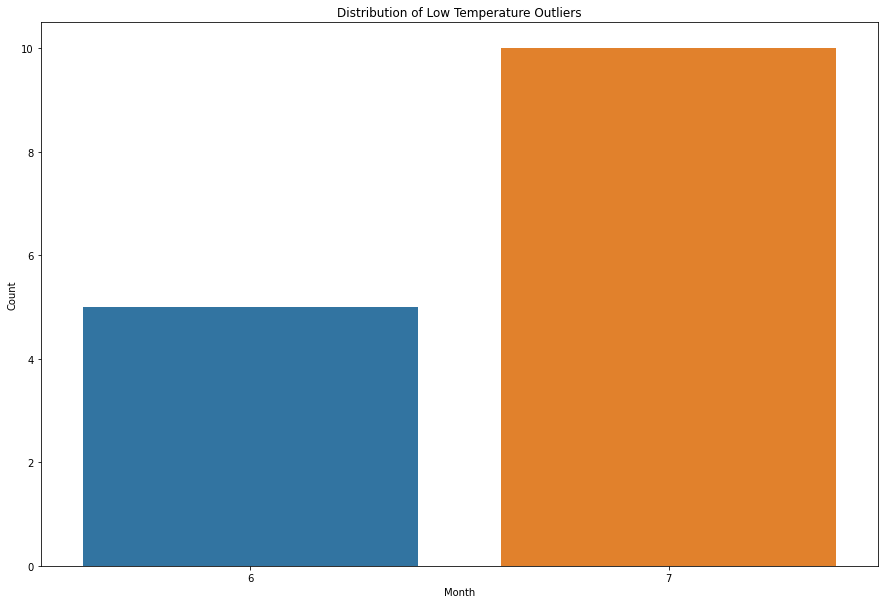

In [51]:
#Histogram
plt.figure(figsize=(15,10))
sns.barplot(data=t_low_df, x='Month', y='Count')
plt.title('Distribution of Low Temperature Outliers')
plt.show()

Now that we know what the upper and lower caps are, we can apply capping to the outliers. This effectively means that we replace any values which exceed the upper and lower limits are replaced with the upper and lower limit respectively.

In [52]:
# final_df['TEMPERATURE'] = np.where(final_df['TEMPERATURE']>temp_highest_allowed,temp_highest_allowed, np.where(final_df['TEMPERATURE']<temp_lowest_allowed,temp_lowest_allowed,final_df['TEMPERATURE']))

In [53]:
# final_df_temp_highest = round(final_df['TEMPERATURE'].mean() + 3*final_df['TEMPERATURE'].std(),2)
# final_df_temp_lowest = round(final_df['TEMPERATURE'].mean() - 3*final_df['TEMPERATURE'].std(),2)
# print(final_df_temp_highest)
# print(final_df_temp_lowest)

## Price
The following sections looks at the outliers which might exist in the price data points which we are going to be using for future modelling.

In [54]:
price_outlier_df = final_df[['rrp', 'month', 'season']]
# print(price_outlier_df)

### Scatterplot of Price

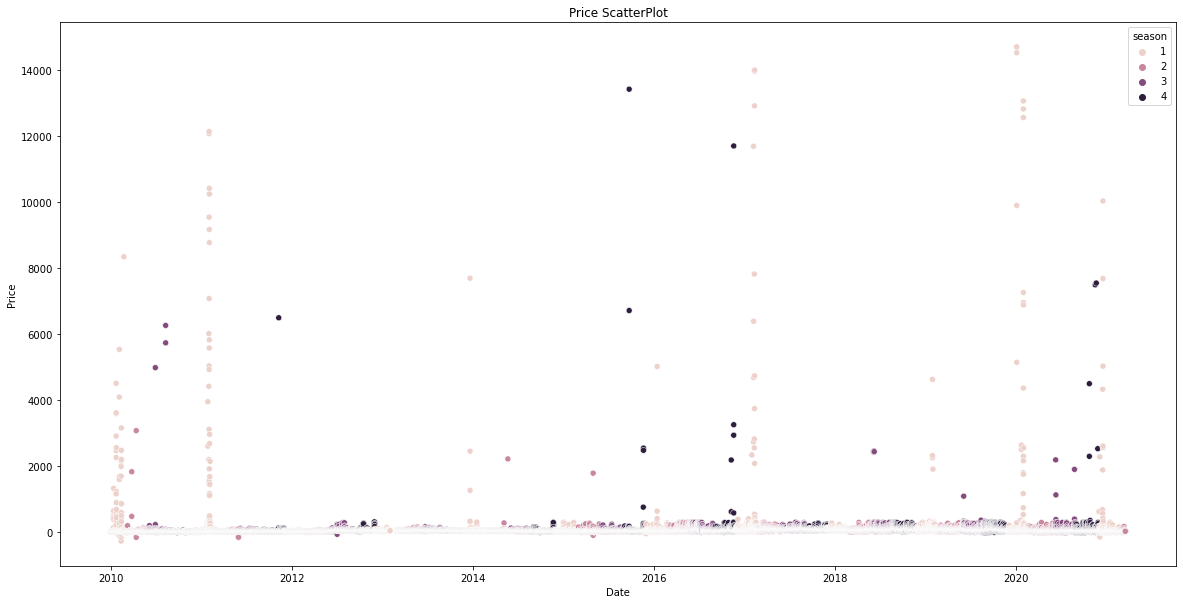

In [55]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=price_outlier_df, x='Unnamed: 0', y='rrp', hue='season')
plt.title('Price ScatterPlot')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Price Outlier Analysis
Copying the values which are identified as outliers to a dataframe to analyse a little further.

In [56]:
price_highest_allowed = round(price_outlier_df['rrp'].mean() + 3 * price_outlier_df['rrp'].std(), 2)
price_lowest_allowed = round(price_outlier_df['rrp'].mean() - 3 * price_outlier_df['rrp'].std(), 2)

In [57]:
price_outliers = price_outlier_df[(price_outlier_df['rrp']>price_highest_allowed) | (price_outlier_df['rrp']<price_lowest_allowed)]
print(len(price_outliers))

151


In [58]:
price_outliers

,rrp,month,season
Unnamed: 0,,,
2010-01-12 13:30:00,545.01,1,1
2010-01-12 14:00:00,1331.79,1,1
2010-01-12 15:00:00,655.03,1,1
2010-01-22 11:30:00,1243.36,1,1
2010-01-22 12:30:00,2915.29,1,1
...,...,...,...
2020-12-17 16:00:00,7684.97,12,1
2020-12-17 16:30:00,10034.46,12,1
2020-12-17 17:00:00,2565.14,12,1


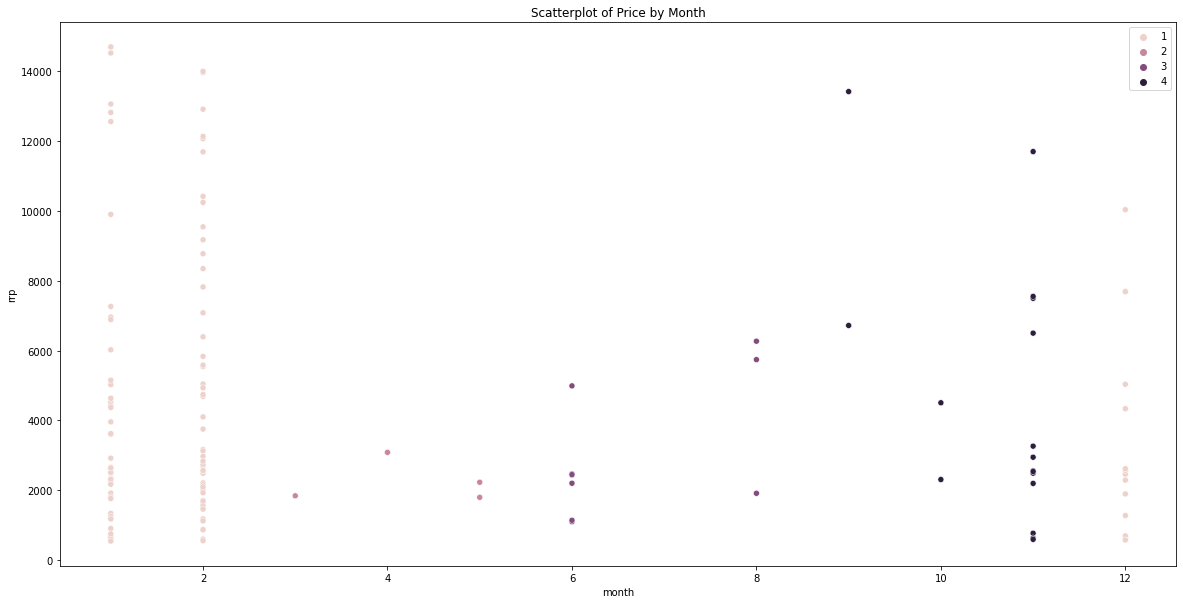

In [59]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=price_outliers,x='month', y='rrp', hue='season')
plt.title('Scatterplot of Price by Month')
plt.legend()
plt.show()

#### Price Outlier by Month

In [60]:
# low_outliers = temp_outliers.loc[temp_outliers['TEMPERATURE']<temp_lowest_allowed]
price_out_df = price_outliers['month'].value_counts()
price_out_df = price_out_df.reset_index()
price_out_df.columns = ['Month', 'Count']
price_out_df_sorted = price_out_df.sort_values(by='Month', ascending=True)
# print(price_out_df_sorted)

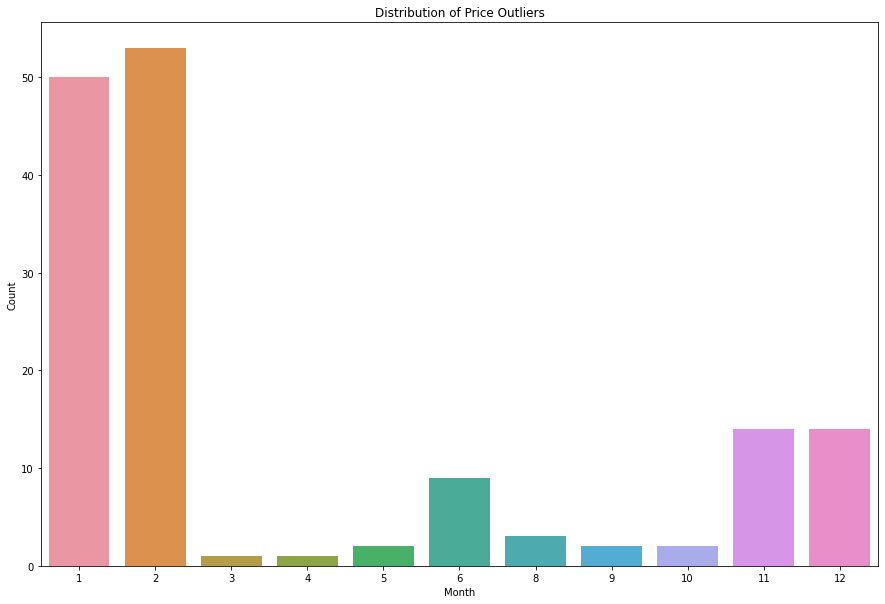

In [61]:
# Histogram
plt.figure(figsize=(15, 10))
sns.barplot(data=price_out_df_sorted, x='Month', y='Count')
plt.title('Distribution of Price Outliers')
plt.show()

## Total Demand

In [62]:
total_demand_highest_allowed = round(final_df['TOTALDEMAND'].mean() + 3 * final_df['TOTALDEMAND'].std(), 2)
total_demand_lowest_allowed = round(final_df['TOTALDEMAND'].mean() - 3 * final_df['TOTALDEMAND'].std(), 2)
print(total_demand_highest_allowed)
print(total_demand_lowest_allowed)

12010.91
4212.38


In [63]:
total_demand_outliers = final_df[(final_df['TOTALDEMAND'] > total_demand_highest_allowed) | (final_df['TOTALDEMAND'] < total_demand_lowest_allowed)]
print(len(total_demand_outliers))

871


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


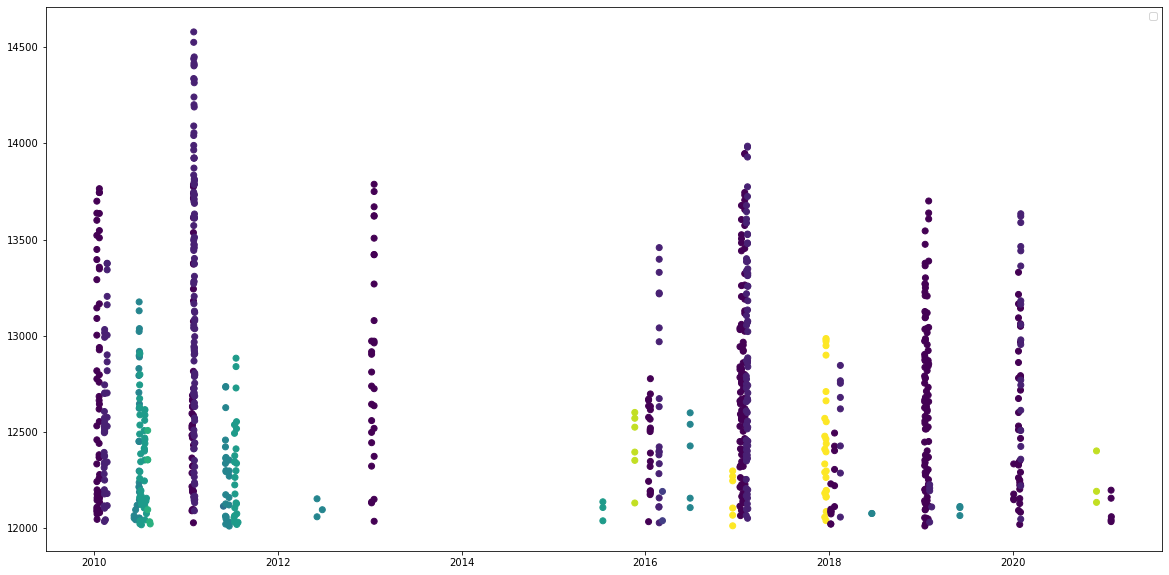

In [64]:
plt.figure(figsize=(20, 10))
plt.scatter(
    total_demand_outliers.index, 
    total_demand_outliers['TOTALDEMAND'], 
    c=total_demand_outliers['month']
)
plt.legend()
plt.show()

In [65]:
print(total_demand_outliers['month'].value_counts())
#ToDO: Sort values by month

1     407
2     279
7      71
6      64
12     32
11      9
8       6
3       2
5       1
Name: month, dtype: int64


Total Demand outliers can be seen during the months from Nov to Feb. 

In [66]:
from sklearn.ensemble import IsolationForest

In [67]:
handle_outliers = final_df[['TEMPERATURE', 'rrp', 'TOTALDEMAND', 'month', 'season']]

In [68]:
random_state = np.random.RandomState(42)

model = IsolationForest(
    n_estimators=100, 
    max_samples='auto', 
    contamination=float(0.003)
)

model.fit(handle_outliers[['TEMPERATURE']])
print(model.get_params())
handle_outliers['Iso_forest_scores'] = model.decision_function(handle_outliers[['TEMPERATURE']])
handle_outliers['anomaly_score'] = model.predict(handle_outliers[['TEMPERATURE']])
handle_outliers[handle_outliers['anomaly_score'] == -1].head()
anomaly_df = handle_outliers[handle_outliers['anomaly_score'] == -1]
no_anomaly_df = handle_outliers[handle_outliers['anomaly_score'] == 1]

{'bootstrap': False, 'contamination': 0.003, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [69]:
anomaly_df.columns

Index(['TEMPERATURE', 'rrp', 'TOTALDEMAND', 'month', 'season',
       'Iso_forest_scores', 'anomaly_score'],
      dtype='object')

In [70]:
anomaly_df

,TEMPERATURE,rrp,TOTALDEMAND,month,season,Iso_forest_scores,anomaly_score
Unnamed: 0,,,,,,,
2010-01-09 12:30:00,35.4,55.31,10675.20,1,1,-0.005077,-1
2010-01-09 13:00:00,36.3,54.09,10842.61,1,1,-0.020669,-1
2010-01-09 13:30:00,35.7,60.02,10953.88,1,1,-0.010853,-1
2010-01-09 14:00:00,35.6,58.62,11056.98,1,1,-0.009827,-1
2010-01-22 12:00:00,36.2,290.81,12797.49,1,1,-0.020669,-1
...,...,...,...,...,...,...,...
2021-01-26 12:30:00,37.7,35.54,9871.84,1,1,-0.028617,-1
2021-01-26 13:00:00,38.2,36.75,10147.46,1,1,-0.029668,-1
2021-01-26 13:30:00,38.5,36.23,10414.34,1,1,-0.032303,-1


In [71]:
print('Total Anomalies:', len(anomaly_df))
print('Total non-Anomaly:', len(no_anomaly_df))

Total Anomalies: 554
Total non-Anomaly: 194035


## Temperature Data - Checking Observations per Day
Where the dates were grouped, the number of observations were counted and if the number of expected observations is less than 48 the rows related to this date are dropped.
- 5 minute intervals = (24 * 60)/5 = 288 observations (per day)
- 30 minute intervals = (24*60)/30 = 48 observations (per day)

30 days of data are missing from the observations.
30 days -> 30*48 = 1440

Final_df
- Has this been cleaned and outlier handling been done

Check temperature data for missing observations.


In [155]:
temp_data = r'./../data/NSW/temperature_nsw.csv' 
temp = pd.read_csv(temp_data)
print(temp.shape[0])
temp = temp[['DATETIME','TEMPERATURE']]
temp.index = pd.to_datetime(temp.index)
temp.index = temp.index.strftime('%Y-%m-%d')

temp.set_index('DATETIME',inplace=True)
temp.index = pd.to_datetime(temp.index)

220326


In [124]:
temp['date'] = temp.index.date
temp['time'] = temp.index.time

#Sorting index to get days of months together - previously sorted by month
temp.sort_index(ascending=True,inplace=True)

temp_resampled = temp.resample('30min').mean()
print(temp_resampled.shape[0])
print(temp_resampled.tail())



209040
                     TEMPERATURE
DATETIME                        
2021-12-03 21:30:00        22.00
2021-12-03 22:00:00        20.95
2021-12-03 22:30:00        20.50
2021-12-03 23:00:00        20.30
2021-12-03 23:30:00        20.60


In [169]:
temp_obs = temp_resampled.groupby(temp_resampled.index.date).size().reset_index(name='obs_count')
temp_obs.set_index('index',inplace=True)
print(temp_obs)

            obs_count
index                
2010-01-01         48
2010-01-02         48
2010-01-03         48
2010-01-04         48
2010-01-05         48
2010-01-06         48
2010-01-07         48
2010-01-08         48
2010-01-09         48
2010-01-10         48
2010-01-11         48
2010-01-12         48
2010-01-13         48
2010-01-14         48
2010-01-15         48
2010-01-16         48
2010-01-17         48
2010-01-18         48
2010-01-19         48
2010-01-20         48
2010-01-21         48
2010-01-22         48
2010-01-23         48
2010-01-24         48
2010-01-25         48
2010-01-26         48
2010-01-27         48
2010-01-28         48
2010-01-29         48
2010-01-30         48
2010-01-31         48
2010-02-01         48
2010-02-02         48
2010-02-03         48
2010-02-04         48
2010-02-05         48
2010-02-06         48
2010-02-07         48
2010-02-08         48
2010-02-09         48
2010-02-10         48
2010-02-11         48
2010-02-12         48
2010-02-13

In [170]:
temp_obs.index = pd.to_datetime(temp_obs.index)
temp_obs = temp_obs[temp_obs.index == '2013-02-02']
print(temp_obs)

            obs_count
index                
2013-02-02         48


In [171]:
print(temp_obs[temp_obs['obs_count']>48])

Empty DataFrame
Columns: [obs_count]
Index: []


We are only missing days of data where complete observations are missing - there are consistently 48 readings per day.

In [172]:
temp_df = final_df[['TEMPERATURE', 'month', 'season']]
print(temp_df.head())

                     TEMPERATURE  month  season
Unnamed: 0                                     
2010-01-01 00:30:00         22.9      1       1
2010-01-01 01:00:00         22.6      1       1
2010-01-01 01:30:00         22.5      1       1
2010-01-01 02:00:00         22.5      1       1
2010-01-01 02:30:00         22.4      1       1


In [173]:
test_obs = temp_df.groupby(temp_df.index.date).size().reset_index(name='obs_count')
print(test_obs)

           index  obs_count
0     2010-01-01         47
1     2010-01-02         48
2     2010-01-03         48
3     2010-01-04         48
4     2010-01-05         48
5     2010-01-06         48
6     2010-01-07         48
7     2010-01-08         48
8     2010-01-09         48
9     2010-01-10         47
10    2010-01-11         47
11    2010-01-12         48
12    2010-01-13         48
13    2010-01-14         47
14    2010-01-15         47
15    2010-01-16         47
16    2010-01-17         48
17    2010-01-18         48
18    2010-01-19         46
19    2010-01-20         47
20    2010-01-21         47
21    2010-01-22         48
22    2010-01-23         46
23    2010-01-24         47
24    2010-01-25         48
25    2010-01-26         48
26    2010-01-27         48
27    2010-01-28         48
28    2010-01-29         48
29    2010-01-30         48
30    2010-01-31         48
31    2010-02-01         47
32    2010-02-02         48
33    2010-02-03         47
34    2010-02-04    

In [174]:
test_obs = test_obs[test_obs['obs_count']<48]
print(test_obs.head(161))
print(test_obs.shape[0])

           index  obs_count
0     2010-01-01         47
9     2010-01-10         47
10    2010-01-11         47
13    2010-01-14         47
14    2010-01-15         47
15    2010-01-16         47
18    2010-01-19         46
19    2010-01-20         47
20    2010-01-21         47
22    2010-01-23         46
23    2010-01-24         47
31    2010-02-01         47
33    2010-02-03         47
35    2010-02-05         46
36    2010-02-06         47
39    2010-02-09         47
40    2010-02-10         46
42    2010-02-12         47
44    2010-02-14         45
45    2010-02-15         47
46    2010-02-16         47
47    2010-02-17         46
48    2010-02-18         45
49    2010-02-19         47
50    2010-02-20         46
53    2010-02-23         47
54    2010-02-24         45
55    2010-02-25         47
57    2010-02-27         47
58    2010-02-28         47
60    2010-03-02         47
62    2010-03-04         47
65    2010-03-07         46
66    2010-03-08         46
67    2010-03-09    

There are some differences for dates between the raw temp data and final_df. This could be attributed to data loss during condolidation of dataframes, there are 161 impacted dates.